In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
% matplotlib inline

In [2]:
with open('c1p8.pkl', 'rb') as f:
    data = pickle.load(f, encoding='latin1')

In [3]:
def synthetic_neuron(drive):
    """
    Simulates a mock neuron with a time step of 1ms.
    
    Arguments:
    drive - input to the neuron (expect zero mean; SD=1)
    
    Returns:
    rho - response function (0=non-spike and 1=spike at each time step)
    """

    dt = .001
    T = dt*len(drive)
    time = np.arange(0, T, dt)
    lagSteps = int(.02 / dt)
    drive = np.concatenate((np.zeros(lagSteps), drive[lagSteps:]))
    system = scipy.signal.lti([1], [.03**2, 2*.03, 1])
    _, L, _ = scipy.signal.lsim(system, drive[:,np.newaxis], time)
    rate = np.divide(30, 1 + np.exp(50*(.05-L)))
    spikeProb = rate*dt
    return np.random.rand(len(spikeProb)) < spikeProb

# Spike Triggered Averages

In [4]:
def get_sta(spike_data, stim_data, window_ms, delta_ms):
    assert(window_ms % delta_ms == 0) # delta should divide evenly into window
    spike_data = np.asarray(spike_data)
    stim_data = np.asarray(stim_data)
    deltas_per_window = window_ms // delta_ms
    pre_spike_stims = [stim_data[i - deltas_per_window:i] for i, resp in enumerate(spike_data) 
                       if i >= deltas_per_window and resp == 1]
    sta = np.mean(pre_spike_stims, axis=0)
    times = np.linspace(-window_ms, 0, num=deltas_per_window, endpoint=False)
    return times, sta

In [5]:
rho = data['rho'].flatten()
s = data['stim'].flatten()
delta_t = 2 # ms
window = 200 # ms

rho.sum()

53601

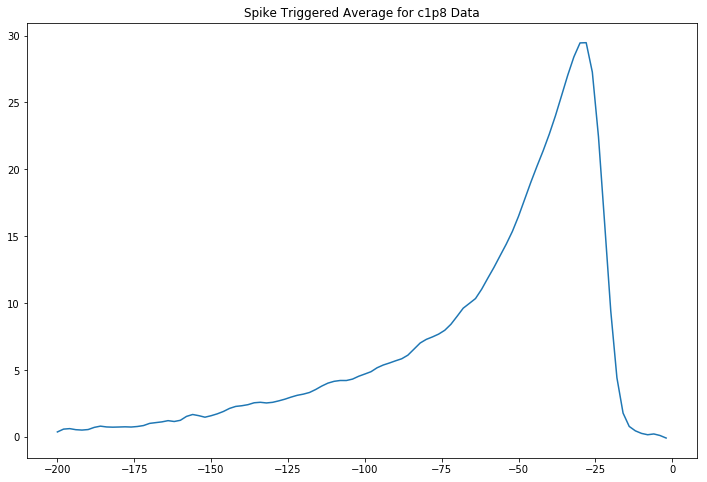

In [6]:
times, sta = get_sta(rho, s, window, delta_t)

plt.figure(figsize=(12,8))
plt.plot(times, sta)
plt.title('Spike Triggered Average for c1p8 Data')
plt.show()

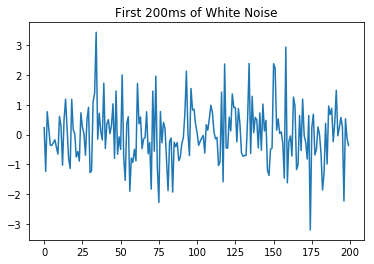

911

In [7]:
T = 100 * 1000 # 100s trial in ms
delta_t = 1 # ms
noise = np.random.normal(0,1,T)
plt.plot(noise[0:200])
plt.title('First 200ms of White Noise')
plt.show()
spikes = synthetic_neuron(noise).astype(int)
spikes.sum()

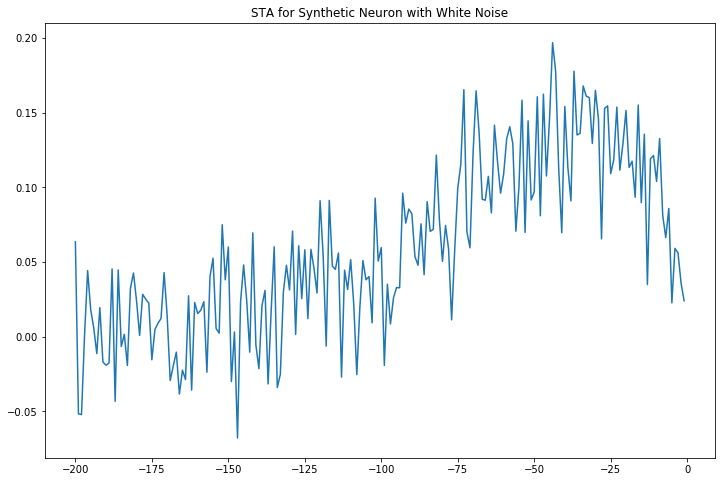

In [8]:
times, sta = get_sta(spikes, noise, 200, delta_t)

plt.figure(figsize=(12,8))
plt.plot(times, sta)
plt.title('STA for Synthetic Neuron with White Noise')
plt.show()

In [9]:
def gaussian(x, mu, sigma):
    return 1. / (np.sqrt(2. * np.pi) * sigma) * np.exp(-np.power((x - mu) / sigma, 2.) / 2)

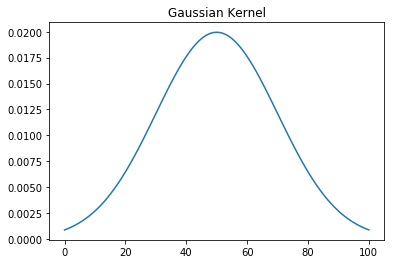

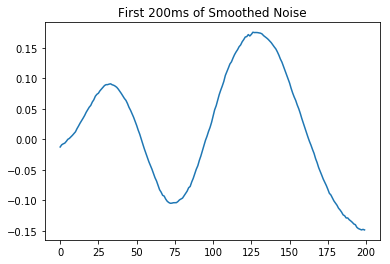

In [10]:
kernel = [gaussian(x, 0, 20) for x in np.arange(-50, 51, 1)]
plt.plot(kernel)
plt.title('Gaussian Kernel')
plt.show()
coloured_noise = np.convolve(kernel, noise, mode='same')
plt.plot(coloured_noise[:200])
plt.title('First 200ms of Smoothed Noise')
plt.show()

853


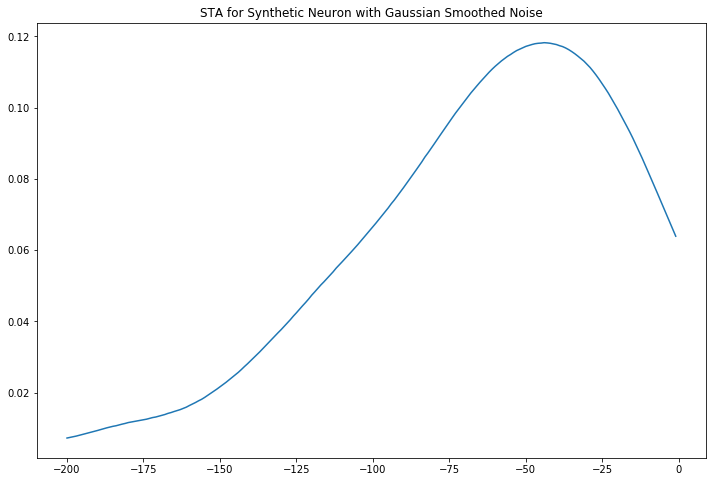

In [11]:
spikes = synthetic_neuron(coloured_noise).astype(int)
print(spikes.sum())

times, sta = get_sta(spikes, coloured_noise, 200, delta_t)

plt.figure(figsize=(12,8))
plt.plot(times, sta)
plt.title('STA for Synthetic Neuron with Gaussian Smoothed Noise')
plt.show()